In [ ]:
import cv2
from matplotlib import pyplot as plt
from deepface import DeepFace
import numpy as np
from moviepy.editor import *
import math

In [7]:
# Potential new imports
from tensorflow.keras.layers.experimental import LocallyConnected2D

# OR some other location where it might have moved

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [2]:
def get_facial_frames(video_path):
    faces = []
    cap = cv2.VideoCapture(video_path)  # read video file
    fps = cap.get(cv2.CAP_PROP_FPS)
    fps = math.ceil(fps)
    path = os.path.basename(video_path)

    i = 0
    while cap.isOpened():
        i = i + 1

        ret, frame = cap.read()

        if not ret:
            break

        face_props = DeepFace.extract_faces(
            img_path=frame,
            target_size=(224, 224),
            detector_backend="retinaface",
            enforce_detection=False,
        )

        frame = cv2.cvtColor(face_props[0]["face"], cv2.COLOR_BGR2RGB)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        confidence = face_props[0]["confidence"]
        if confidence > 0.990:
            features_dict = {"frames": frame, "confidence": confidence}
            faces.append(features_dict)

        if (i % 10 == 0) and i > 1:
            print(f"Total frames processed {i}")

    return faces, fps, path

In [3]:
video_path = r"M:\videos\samples\training\anomaly\0.mp4"
video_frames, fps, path = get_facial_frames(video_path)

NameError: name 'math' is not defined

Total number of frames in the video: 217
The frame rate per second: 30
The file name: 0.mp4
Displaying frame number 50...


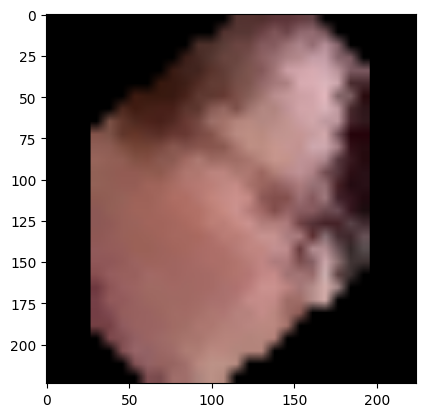

In [6]:
print(f"Total number of frames in the video: {len(video_frames)}")
print(f"The frame rate per second: {fps}")
print(f"The file name: {path}")
frame_number = 50
print(f"Displaying frame number {frame_number}...")

image = video_frames[frame_number]["frames"]
plt.imshow(image)

In [7]:
image_frames = []

for video_frame in video_frames:
    a = video_frame["frames"]
    image_frame = np.interp(a, (a.min(), a.max()), (0, 255)).astype(np.uint8)
    image_frames.append(image_frame)

# Create a video clip from the frames
clip = ImageSequenceClip(image_frames, fps=fps)

# Write the video clip to a file
direct_path = r"D:\\"
clip.write_videofile(direct_path + path)

Moviepy - Building video D:\\0.mp4.
Moviepy - Writing video D:\\0.mp4



Moviepy - Done !
Moviepy - video ready D:\\0.mp4
